[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


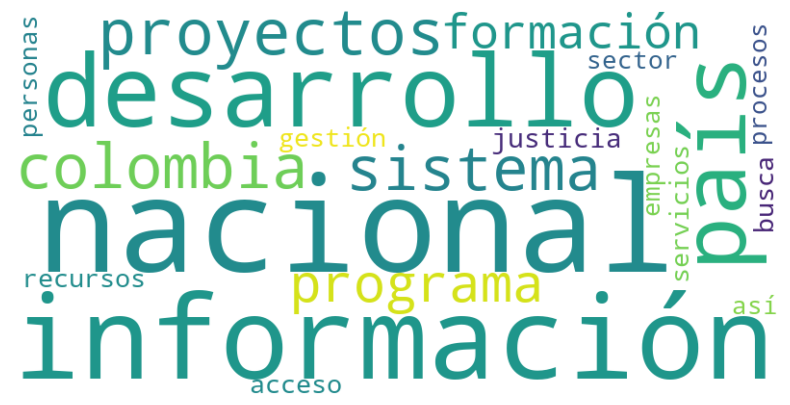

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

def analizar_instrumentos_politica(ruta_archivo):
    """
    Analiza sentimientos y extrae palabras clave de descripciones de instrumentos de política pública.
    
    Parámetros:
    ruta_archivo (str): Ruta del archivo Excel con los instrumentos
    
    Retorna:
    dict: Resultados de análisis de sentimiento y palabras clave
    """
    # Cargar archivo Excel
    df = pd.read_excel(ruta_archivo)
    
    # Verificar columna de descripción
    if 'Descripcion' not in df.columns:
        raise ValueError("El archivo debe contener una columna llamada 'Descripcion'")
    
    # Preprocesar y analizar descripciones
    descripciones = df['Descripcion']
    
    # Configurar stopwords en español
    stop_words = set(stopwords.words('spanish'))
    stop_words.update(['gobierno', 'política', 'públicas', 'instrumento', 'través'])
    
    # Análisis de sentimiento y extracción de palabras
    resultados = {
        'sentimientos': [],
        'palabras_frecuentes': [],
        'analisis_sentimiento_general': None
    }
    
    # Tokenización y limpieza de palabras
    todas_palabras = []
    for descripcion in descripciones:
        # Análisis de sentimiento individual
        sentimiento = TextBlob(str(descripcion)).sentiment.polarity
        resultados['sentimientos'].append(sentimiento)
        
        # Tokenización
        palabras = word_tokenize(str(descripcion).lower())
        palabras_limpias = [
            palabra for palabra in palabras 
            if palabra.isalnum() and palabra not in stop_words
        ]
        
        todas_palabras.extend(palabras_limpias)
    
    # Distribución de frecuencia de palabras
    freq_dist = FreqDist(todas_palabras)
    resultados['palabras_frecuentes'] = freq_dist.most_common(20)
    
    # Sentimiento general
    resultados['analisis_sentimiento_general'] = sum(resultados['sentimientos']) / len(resultados['sentimientos'])
    
    return resultados

# Ruta del archivo de Excel con los datos
ruta = 'C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/2024 11 01 - Base Original.xlsx'
resultados = analizar_instrumentos_politica(ruta)

# Generar la nube de palabras a partir de los resultados
word_freq_dict = dict(resultados['palabras_frecuentes'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

def analizar_instrumentos_politica(ruta_archivo):
    df = pd.read_excel(ruta_archivo)
    
    stop_words = set(stopwords.words('spanish'))
    stop_words.update(['gobierno', 'política', 'públicas', 'instrumento', 'través'])
    
    # Lista para guardar los sentimientos individuales
    sentimientos = []
    todas_palabras = []
    
    for descripcion in df['Descripcion']:
        # Analizar sentimiento de cada descripción
        sentimiento = TextBlob(str(descripcion)).sentiment.polarity
        sentimientos.append(sentimiento)
        
        # Tokenizar y limpiar palabras
        palabras = word_tokenize(str(descripcion).lower())
        palabras_limpias = [
            palabra for palabra in palabras 
            if palabra.isalnum() and palabra not in stop_words
        ]
        
        todas_palabras.extend(palabras_limpias)
    
    # Calcular frecuencia de palabras
    freq_dist = FreqDist(todas_palabras)
    palabras_frecuentes = freq_dist.most_common(20)
    
    # Calcular el sentimiento promedio general
    sentimiento_promedio = sum(sentimientos) / len(sentimientos)
    sentimiento_categoria = pd.cut(
        [sentimiento_promedio], 
        bins=[-1, -0.1, 0.1, 1],
        labels=['Negative', 'Neutral', 'Positive']
    )[0]
    
    # Crear DataFrame de palabras frecuentes con el sentimiento promedio
    resultados_df = pd.DataFrame(palabras_frecuentes, columns=['Word', 'Frequency'])
    resultados_df['Sentiment'] = sentimiento_categoria  # Asignar el sentimiento promedio
    
    # Guardar el DataFrame en un archivo CSV
    resultados_df.to_csv('sentiment_results.csv', index=False)

# Ejecutar el análisis
ruta = 'C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/2024 11 01 - Base Original.xlsx'
analizar_instrumentos_politica(ruta)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
